In [1]:
import pickle
import numpy as np
import pandas as pd
import importlib as imp

from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
from dateutil.relativedelta import relativedelta
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

import train
import build_features

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 1000)
display(HTML("<style>.container { width:98% !important; }</style>"))
HTML("""
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>
""")

/home/rob/Documents/GitHub/ObesityPY/src/train.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rob/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rob/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rob/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rob/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
 

## Import the pickled data and define the age ranges

In [2]:
d1 = pickle.load(open('/home/rob/ObesityPY/python objects/patientdata_20170823.pkl', 'rb')) # first cohort data
d2 = pickle.load(open('/home/rob/Documents/patient_data_2_20181004.pkl', 'rb')) # second cohort data

d1mom = pickle.load(open('/home/rob/ObesityPY/python objects/patient_mother_data_20170724.pkl', 'rb')) # maternal data for first cohort (from time of birth)
d1mom_hist = pickle.load(open('/home/rob/ObesityPY/python objects/full_lutheran_mother_data.pkl', 'rb')) # maternal data for first cohort (any record, aside from birth, if at same hospital)

In [3]:
agex_low = 4.5 # lower bound on data to be used for y (in years)
agex_high = 5.5 # upper bound on data to be used for y (in years)
months_from = 0 # lower bound on data to be used for X (in months)
months_to = 24 # upper bound on data to be used for X (in months)

## Create a data array for the first cohort

In [4]:
x1_1, y1_1, y1_1label, feature_headers, mrns1_1 = build_features.call_build_function(
    d1, d1mom, d1mom_hist, {}, {}, 
    agex_low, agex_high, months_from, months_to, 
    False, prediction='multi'
)

Processing 52,945 patients: 52945it [02:57, 297.63it/s]   


In [5]:
x1_1.shape, x1_1[(x1_1.sum(axis=1) > 0)].shape

((52945, 19253), (11494, 19253))

## Create a data array for the second cohort

In [6]:
x1_2, y1_2, y1_2label, feature_headers, mrns1_2 = build_features.call_build_function(
    d2, {}, {}, {}, {}, 
    agex_low, agex_high, months_from, months_to, 
    False, prediction='multi'
)

Processing 75,821 patients: 903it [00:00, 1252.76it/s]/home/rob/Documents/GitHub/ObesityPY/src/zscore.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  Z = (((bmi / M)**L) - 1) / (S * L)
Processing 75,821 patients: 75821it [01:22, 914.26it/s] 


In [7]:
x1_2.shape, x1_2[(x1_2.sum(axis=1) > 0)].shape

((75821, 19253), (8747, 19253))

## Create a dictionary id for the weight classifications

**Note:** severe obesity is a subset of 'obese'

In [8]:
label_ix = {'underweight':0,'normal':1,'overweight':2,'obese':3,'class I severe obesity':4,'class II severe obesity':5}

## Prepare the data for cohort 1 w/maternal requirement for inclusion

In [9]:
x2_1_mom, y2_1_mom, y2_1label_mom, mrns2_1_mom, ix_filter_1_mom, feature_headers2_1_mom, corr_headers_filtered_1_mom, corrs_matrix_filtered_1_mom, ix_corr_headers_1_mom = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_1, y1_1, y1_1label[:,label_ix['obese']], feature_headers, mrns1_1,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=True,
        use_vital=True)

Using pre-prepared data

Original cohort size is: 52,945, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 11,484
total number of people who have all filtered variables: 52,945
total number of people who have maternal data available: 3,451
intersection of the three is: 3,449


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.684, min: 10.470, max: 35.320
total patients: 3,449, positive: 642.00, negative: 2,807.00
normalizing output...
Using pre-prepared data
5094 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 3,449 x 19,253


## Prepare the data for cohort 1 w/o maternal requirement for inclusion

In [10]:
x2_1, y2_1, y2_1label, mrns2_1, ix_filter_1, feature_headers2_1, corr_headers_filtered_1, corrs_matrix_filtered_1, ix_corr_headers_1 = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_1, y1_1, y1_1label[:,label_ix['obese']], feature_headers, mrns1_1,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=False,
        use_vital=True)

Using pre-prepared data

Original cohort size is: 52,945, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 11,484
total number of people who have all filtered variables: 52,945
total number of people who have maternal data available: 3,451
5,509 patients selected (excludes maternal)...


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.690, min: 10.385, max: 35.320
total patients: 5,509, positive: 1,036.00, negative: 4,473.00
normalizing output...
Using pre-prepared data
5094 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 5,509 x 19,253


## Prepare the data for cohort 2 w/o maternal requirement for inclusion

In [11]:
x2_2, y2_2, y2_2label, mrns2_2, ix_filter_2, feature_headers2_2, corr_headers_filtered_2, corrs_matrix_filtered_2, ix_corr_headers_2 = \
    train.prepare_data_for_analysis({}, {}, {}, {}, {},
        x1_2, y1_2, y1_2label[:,label_ix['obese']], feature_headers, mrns1_2,
        agex_low, agex_high, months_from, months_to,
        filterSTR=[],
        variablesubset=[],
        do_impute=False,
        do_normalize=False,
        min_occur=0,
        feature_info=False,
        delay_print=False,
        lasso_selection=False,
        use_maternal=False,
        use_vital=True)

Using pre-prepared data

Original cohort size is: 75,821, number of features: 19,253
total number of people who have a valid BMI measured (10 > BMI < 40): 8,671
total number of people who have all filtered variables: 75,821
total number of people who have maternal data available: 0
5,415 patients selected (excludes maternal)...


/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


filtered correlated features to: 18,910
corr matrix is filtered to size: (19253, 18910)
output is: average: 16.908, min: 10.030, max: 39.470
total patients: 5,415, positive: 1,219.00, negative: 4,196.00
normalizing output...
Using pre-prepared data
5094 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: []
total size: 5,415 x 19,253


## Compare the size of each data set and the gender parity

In [12]:
x1_1.shape[0], (x1_1[:, feature_headers.index('Gender:0 male')] > 0).sum(), (x1_1[:, feature_headers.index('Gender:1 female')] > 0).sum()

(52945, 5775, 5719)

In [13]:
x1_2.shape[0], (x1_2[:, feature_headers.index('Gender:0 male')] > 0).sum(), (x1_2[:, feature_headers.index('Gender:1 female')] > 0).sum()

(75821, 4690, 4120)

In [14]:
x2_1_mom.shape[0], (x2_1_mom[:, feature_headers2_1_mom.index('Gender:0 male')] > 0).sum(), (x2_1_mom[:, feature_headers2_1_mom.index('Gender:1 female')] > 0).sum()

(3449, 1751, 1698)

In [15]:
x2_1.shape[0], (x2_1[:, feature_headers2_1.index('Gender:0 male')] > 0).sum(), (x2_1[:, feature_headers2_1.index('Gender:1 female')] > 0).sum()

(5509, 2756, 2753)

In [16]:
x2_2.shape[0], (x2_2[:, feature_headers2_2.index('Gender:0 male')] > 0).sum(), (x2_2[:, feature_headers2_2.index('Gender:1 female')] > 0).sum()

(5415, 2857, 2558)

In [17]:
# this is for all of cohort 1
boys = 0
girls = 0
for pid in d1:
    if d1[pid]['gender']:
        boys += 1
    else:
        girls += 1
boys, girls, boys + girls

(26438, 26507, 52945)

In [18]:
# this is for all of cohort 2
boys = 0
girls = 0
for pid in d2:
    if d2[pid]['gender']:
        boys += 1
    else:
        girls += 1
boys, girls, boys + girls

(36189, 39632, 75821)

## Display some of the summary statistics on weight

In [19]:
print('Cohort 1 Weight Classification Breakdown\n')
cats = ['Weight Class', 'N', '%', '% Boys', '% Girls']
print('\033[1m' + ' | '.join((label.rjust(30) if i == 0 else label.rjust(6) for i, label in enumerate(cats))) + '\033[0m')

total = y1_1label[ix_filter_1, :4].sum()
for i, (label, num) in enumerate(zip(label_ix, y1_1label[ix_filter_1].sum(axis=0))):
    bpct = (ix_filter_1 & (y1_1label[:, i] == 1) & (x1_1[:, feature_headers.index('Gender:0 male')] == 1)).sum() / num * 100
    print(' | '.join((label.rjust(30), '{0:,.0f}'.format(num).rjust(6), '{0:2.1f}%'.format(100*num/total).rjust(6), '{0:2.1f}%'.format(bpct).rjust(6), '{0:2.1f}%'.format(100 - bpct).rjust(6))))
print(total)

Cohort 1 Weight Classification Breakdown

                  Weight Class |      N |      % | % Boys | % Girls
                   underweight |    127 |   2.3% |  48.8% |  51.2%
                        normal |  3,372 |  61.2% |  48.0% |  52.0%
                    overweight |    974 |  17.7% |  49.2% |  50.8%
                         obese |  1,036 |  18.8% |  57.6% |  42.4%
        class I severe obesity |    149 |   2.7% |  59.7% |  40.3%
       class II severe obesity |     40 |   0.7% |  67.5% |  32.5%
5509.0


In [20]:
print('Cohort 2 Weight Classification Breakdown\n')
cats = ['Weight Class', 'N', '%', '% Boys', '% Girls']
print('\033[1m' + ' | '.join((label.rjust(30) if i == 0 else label.rjust(6) for i, label in enumerate(cats))) + '\033[0m')

total = y1_2label[ix_filter_2, :4].sum()
for i, (label, num) in enumerate(zip(label_ix, y1_2label[ix_filter_2].sum(axis=0))):
    bpct = (ix_filter_2 & (y1_2label[:, i] == 1) & (x1_2[:, feature_headers.index('Gender:0 male')] == 1)).sum() / num * 100
    print(' | '.join((label.rjust(30), '{0:,.0f}'.format(num).rjust(6), '{0:2.1f}%'.format(100*num/total).rjust(6), '{0:2.1f}%'.format(bpct).rjust(6), '{0:2.1f}%'.format(100 - bpct).rjust(6))))
print(total)

Cohort 2 Weight Classification Breakdown

                  Weight Class |      N |      % | % Boys | % Girls
                   underweight |    157 |   2.9% |  55.4% |  44.6%
                        normal |  3,075 |  56.8% |  52.8% |  47.2%
                    overweight |    964 |  17.8% |  50.1% |  49.9%
                         obese |  1,219 |  22.5% |  54.3% |  45.7%
        class I severe obesity |    203 |   3.7% |  54.2% |  45.8%
       class II severe obesity |     69 |   1.3% |  66.7% |  33.3%
5415.0


## Display some of the summary statistics on race and ethnicity

**Note:** Cohort 2 includes Hispanic/Latina as a race as opposed to ethnicity as is traditionally reported

In [21]:
print('Cohort 1 Racial Breakdown\n')
cats = ['Race Category', 'N', '%', '% Boys', '% Girls', '% Obese']
print('\033[1m' + ' | '.join((label.rjust(45) if i == 0 else label.rjust(7) for i, label in enumerate(cats))) + '\033[0m')

race_cats = [(i,f) for i, f in enumerate(feature_headers) if f.startswith('Race')]
boys_ix = feature_headers.index('Gender:0 male')
total = ix_filter_1.sum()
for i,f in race_cats:
    num = (ix_filter_1 & (x1_1[:, i] == 1)).sum()
    opct = (ix_filter_1& (x1_1[:, i] == 1) & (y1_1label[:, label_ix['obese']] == 1)).sum() / num * 100 if num > 0 else 0
    numb = (ix_filter_1 & (x1_1[:, i] == 1) & (x1_1[:, boys_ix] == 1)).sum()
    bpct = numb / num * 100 if num > 0 else 0
    print(' | '.join((f.rjust(45), '{:,.0f}'.format(num).rjust(7), '{:,.1f}%'.format(num/total*100).rjust(7), '{:,.1f}%'.format(bpct).rjust(7), '{:,.1f}%'.format(100-bpct).rjust(7), '{:,.1f}%'.format(opct).rjust(7))))

Cohort 1 Racial Breakdown

                                Race Category |       N |       % |  % Boys | % Girls | % Obese
                             Race:MULTIRACIAL |   3,831 |   69.5% |   49.5% |   50.5% |   19.3%
                                   Race:ASIAN |     515 |    9.3% |   53.4% |   46.6% |   11.3%
                  Race:AFRICAN AMERICAN/BLACK |     542 |    9.8% |   50.0% |   50.0% |   20.8%
                                   Race:OTHER |     250 |    4.5% |   51.6% |   48.4% |   22.4%
                         Race:CAUCASIAN/WHITE |     327 |    5.9% |   49.2% |   50.8% |   19.3%
       Race:AMERICAN INDIAN OR ALASKAN NATIVE |      26 |    0.5% |   61.5% |   38.5% |    7.7%
       Race:NATIVE HAWAIIAN/PACIFIC ISLANDERS |       2 |    0.0% |   50.0% |   50.0% |    0.0%
                                Race:HISPANIC |       0 |    0.0% |    0.0% |  100.0% |    0.0%


In [22]:
print('Cohort 1 Ethnicity Breakdown\n')
cats = ['Ethnicity Category', 'N', '%', '% Boys', '% Girls', '% Obese']
print('\033[1m' + ' | '.join((label.rjust(45) if i == 0 else label.rjust(7) for i, label in enumerate(cats))) + '\033[0m')

ethn_cats = [(i,f) for i, f in enumerate(feature_headers) if f.startswith('Ethnicity')]
boys_ix = feature_headers.index('Gender:0 male')
total = ix_filter_1.sum()
for i,f in ethn_cats:
    num = (ix_filter_1 & (x1_1[:, i] == 1)).sum()
    opct = (ix_filter_1& (x1_1[:, i] == 1) & (y1_1label[:, label_ix['obese']] == 1)).sum() / num * 100 if num > 0 else 0
    numb = (ix_filter_1 & (x1_1[:, i] == 1) & (x1_1[:, boys_ix] == 1)).sum()
    bpct = numb / num * 100 if num > 0 else 0
    print(' | '.join((f.rjust(45), '{:,.0f}'.format(num).rjust(7), '{:,.1f}%'.format(num/total*100).rjust(7), '{:,.1f}%'.format(bpct).rjust(7), '{:,.1f}%'.format(100-bpct).rjust(7), '{:,.1f}%'.format(opct).rjust(7))))

Cohort 1 Ethnicity Breakdown

                           Ethnicity Category |       N |       % |  % Boys | % Girls | % Obese
                           Ethnicity:HISPANIC |   4,173 |   75.7% |   49.5% |   50.5% |   19.6%
                       Ethnicity:NON-HISPANIC |   1,260 |   22.9% |   51.4% |   48.6% |   15.7%


In [23]:
print('Cohort 2 Racial Breakdown\n')
cats = ['Race Category', 'N', '%', '% Boys', '% Girls','% Obese']
print('\033[1m' + ' | '.join((label.rjust(45) if i == 0 else label.rjust(7) for i, label in enumerate(cats))) + '\033[0m')

race_cats = [(i,f) for i, f in enumerate(feature_headers) if f.startswith('Race')]
boys_ix = feature_headers.index('Gender:0 male')
total = ix_filter_2.sum()
for i,f in race_cats:
    num = (ix_filter_2 & (x1_2[:, i] == 1)).sum()
    opct = (ix_filter_2& (x1_2[:, i] == 1) & (y1_2label[:, label_ix['obese']] == 1)).sum() / num * 100 if num > 0 else 0
    numb = (ix_filter_2 & (x1_2[:, i] == 1) & (x1_2[:, boys_ix] == 1)).sum()
    bpct = numb / num * 100 if num > 0 else 0
    print(' | '.join((f.rjust(45), '{:,.0f}'.format(num).rjust(7), '{:,.1f}%'.format(num/total*100).rjust(7), '{:,.1f}%'.format(bpct).rjust(7), '{:,.1f}%'.format(100-bpct).rjust(7), '{:,.1f}%'.format(opct).rjust(7))))

Cohort 2 Racial Breakdown

                                Race Category |       N |       % |  % Boys | % Girls | % Obese
                             Race:MULTIRACIAL |       0 |    0.0% |    0.0% |  100.0% |    0.0%
                                   Race:ASIAN |     322 |    5.9% |   58.7% |   41.3% |   14.3%
                  Race:AFRICAN AMERICAN/BLACK |     604 |   11.2% |   54.3% |   45.7% |   19.0%
                                   Race:OTHER |   3,977 |   73.4% |   52.3% |   47.7% |   23.4%
                         Race:CAUCASIAN/WHITE |     140 |    2.6% |   52.1% |   47.9% |   20.0%
       Race:AMERICAN INDIAN OR ALASKAN NATIVE |      36 |    0.7% |   55.6% |   44.4% |   30.6%
       Race:NATIVE HAWAIIAN/PACIFIC ISLANDERS |      13 |    0.2% |   92.3% |    7.7% |   23.1%
                                Race:HISPANIC |     323 |    6.0% |   47.7% |   52.3% |   26.0%


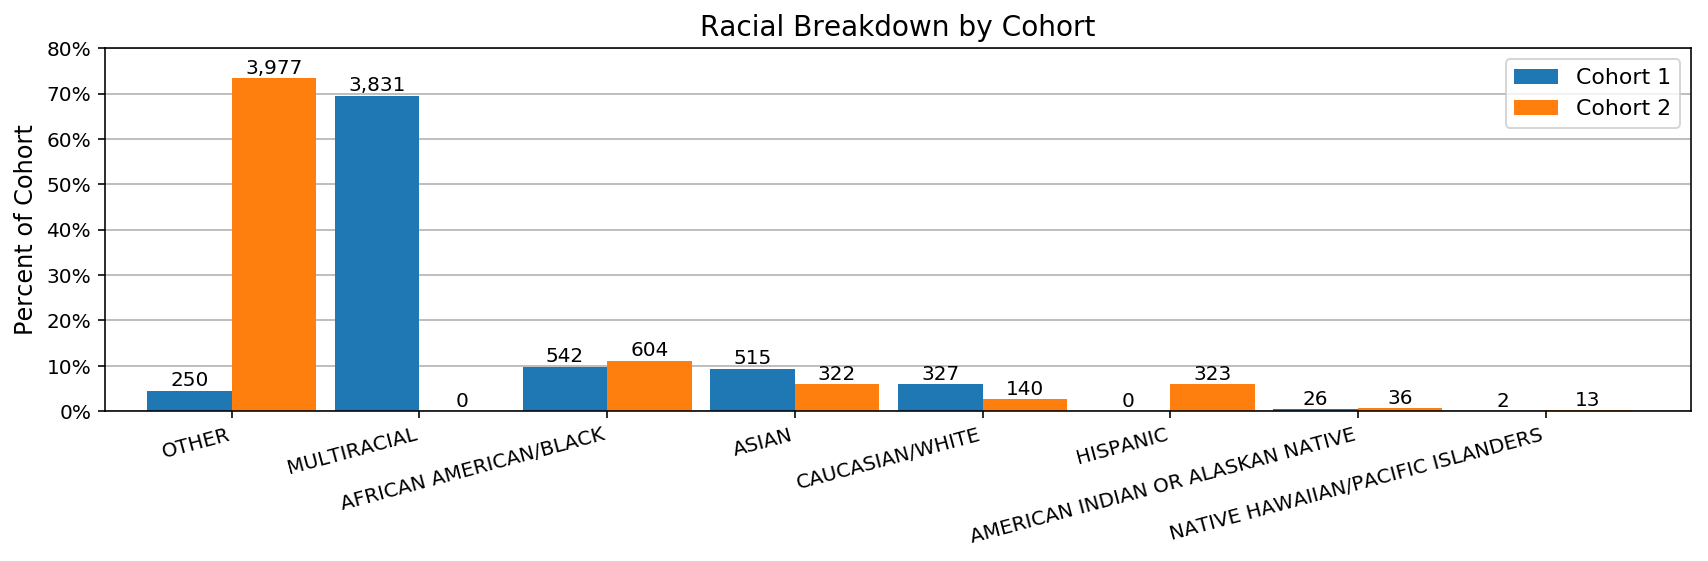

In [24]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)


race_cats = np.array([(i, f) for i, f in enumerate(feature_headers) if f.startswith('Race')])
total1 = ix_filter_1.sum()
total2 = ix_filter_2.sum()
num1 = np.array([(ix_filter_1 & (x1_1[:, int(i)] == 1)).sum() for i, f in race_cats], dtype=float)
num2 = np.array([(ix_filter_2 & (x1_2[:, int(i)] == 1)).sum() for i, f in race_cats], dtype=float)
pct1 = num1 / total1
pct2 = num2 / total2
sorting = np.argsort(num1 + num2)[::-1]

width = 0.45
xticks = np.arange(race_cats.shape[0])
yticks = np.linspace(0, 0.8, 9)

ax.bar(xticks, pct1[sorting], width, label='Cohort 1')
ax.bar(xticks + width, pct2[sorting], width, label='Cohort 2')
for x, p1, n1, p2, n2 in zip(xticks, pct1[sorting], num1[sorting], pct2[sorting], num2[sorting]):
    ax.text(x, p1 + 0.01, '{:,.0f}'.format(n1), ha='center')
    ax.text(x + width, p2 + 0.01, '{:,.0f}'.format(n2), ha='center')


ax.set_xlim(-width, race_cats.shape[0])
ax.set_ylabel('Percent of Cohort', fontsize=12)
ax.set_title('Racial Breakdown by Cohort', fontsize=14)
ax.set_xticks(xticks + width / 2)
ax.set_xticklabels([r.split(':')[1] for r in race_cats[sorting][:, 1]], ha='right', rotation=15)
ax.set_yticks(yticks)
ax.set_yticklabels('{:,.0f}%'.format(y*100) for y in yticks)


ax.set_axisbelow(True)
plt.grid(axis='y')
plt.legend(fontsize=11)
plt.tight_layout()
# plt.savefig('/<path>/racial_breakdown.png', dpi=360, bbox_to_inches=True)
plt.show()

## Compare the number of visits between cohorts

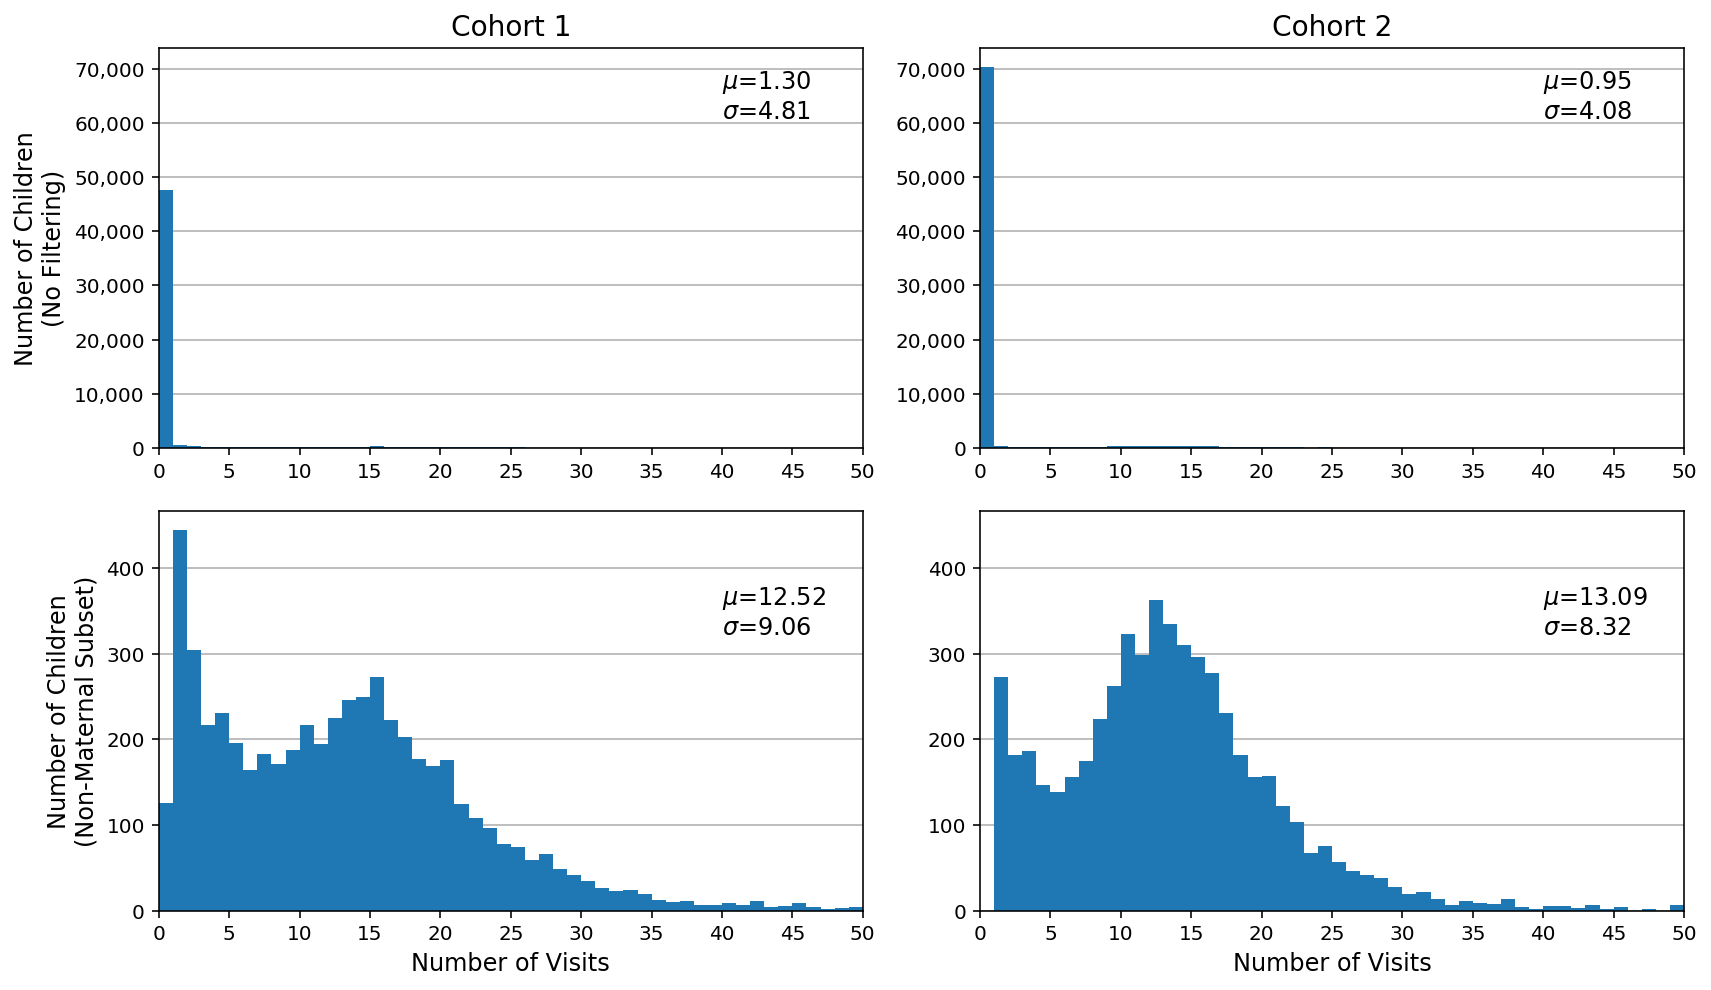

In [25]:
ix_n_visits = feature_headers.index('Number of Visits')

fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(222, sharey=ax1, sharex=ax1)
ax2 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, sharey=ax2, sharex=ax2)

x1 = x1_1[:, ix_n_visits]
x2 = x1_1[ix_filter_1][:, ix_n_visits]
x3 = x1_2[:, ix_n_visits]
x4 = x1_2[ix_filter_2][:, ix_n_visits]

ax1.hist(x1, bins=50, range=(0,50))
ax2.hist(x2, bins=50, range=(0,50))
ax3.hist(x3, bins=50, range=(0,50))
ax4.hist(x4, bins=50, range=(0,50))

xticks = np.linspace(0, 50, 11, dtype=int)
yticks1 = ['{:,.0f}'.format(y) for y in ax1.get_yticks()]
yticks2 = ['{:,.0f}'.format(y) for y in ax2.get_yticks()]
for ax in (ax1, ax2, ax3, ax4):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_xlim(0, 50)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    
for ax in (ax2, ax4):
    ax.set_xlabel('Number of Visits', fontsize=12)
    
for ax, x in zip((ax1, ax3), (x1, x3)):
    mu, sigma = np.mean(x), np.std(x)
    ax.set_yticklabels(yticks1)
    ax.text(40, int(yticks1[-3].replace(',',''))*1.02, '$\mu$={:0.2f}\n$\sigma$={:0.2f}'.format(mu, sigma), fontsize=12)
    
for ax, x in zip((ax2, ax4), (x2, x4)):
    mu, sigma = np.mean(x), np.std(x)
    ax.set_yticklabels(yticks2)
    ax.text(40, int(yticks2[-3].replace(',',''))*1.083, '$\mu$={:0.2f}\n$\sigma$={:0.2f}'.format(mu, sigma), fontsize=12)

ax1.set_ylabel('Number of Children\n(No Filtering)', fontsize=12)
ax2.set_ylabel('Number of Children\n(Non-Maternal Subset)', fontsize=12)

ax1.set_title('Cohort 1', fontsize=14)
ax3.set_title('Cohort 2', fontsize=14)

plt.tight_layout()
# plt.savefig('/<path>/n_visits_comparison.png', dpi=360, bbox_to_inches=True)
plt.show()

## Make some functions for the next few sections

In [26]:
def get_encounter_age(start, end):
    age = relativedelta(end, start)
    age = age.years + age.months / 12. + age.days / 30. / 12. + age.minutes / 60. / 24. / 30. / 12.
    age = round(age, 3)
    return age

def get_age_range(patient_data):
    bdate = patient_data['bdate']
    dates = set().union(*[set([*np.array(patient_data['vitals'][k])[:, 0]]) for k in patient_data['vitals'] if patient_data['vitals'][k] != []])
    try:
        dates = dates.union(*[set([*np.array(patient_data['diags'][k])[:, 0]]) for k in patient_data['diags'] if patient_data['diags'][k] != []])
    except:
        pass
    dates = sorted(list(dates))
    if dates == []:
        return [np.nan, np.nan]
    for i in range(len(dates)):
        first = get_encounter_age(bdate, dates[i])
        if first >= 0:
            break
    last = get_encounter_age(bdate, dates[-1])
    return [first, last]

def make_grid(ranges, bins, filt):
    dim = int(bins.max())
    grid = np.zeros((dim, dim))
    for ix, rng in enumerate(ranges):
        if not filt[ix]:
            continue
        f_ix = np.where(np.histogram(rng[0], bins=bins)[0] == 1)[0][0]
        l_ix = np.where(np.histogram(rng[1], bins=bins)[0] == 1)[0][0]
        grid[l_ix, f_ix] += 1
    return grid

## Describe the distribution of first and last visits in the data - without filtering on the valid set of patients

In [27]:
d1_ranges = np.zeros((len(d1), 2))
d2_ranges = np.zeros((len(d2), 2))
d1_visits = np.zeros(len(d1))
d2_visits = np.zeros(len(d2))

for i, patient_data in enumerate(d1.values()):
    d1_ranges[i] = get_age_range(patient_data)
    dates = set().union(*[set([*np.array(patient_data['vitals'][k])[:, 0]]) for k in patient_data['vitals'] if patient_data['vitals'][k] != []])
    try:
        dates = dates.union(*[set([*np.array(patient_data['diags'][k])[:, 0]]) for k in patient_data['diags'] if patient_data['diags'][k] != []])
    except:
        pass
    d1_visits[i] = len(dates)

for i, patient_data in enumerate(d2.values()):
    d2_ranges[i] = get_age_range(patient_data)
    dates = set().union(*[set([*np.array(patient_data['vitals'][k])[:, 0]]) for k in patient_data['vitals'] if patient_data['vitals'][k] != []])
    d2_visits[i] = len(dates)

/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/rob/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


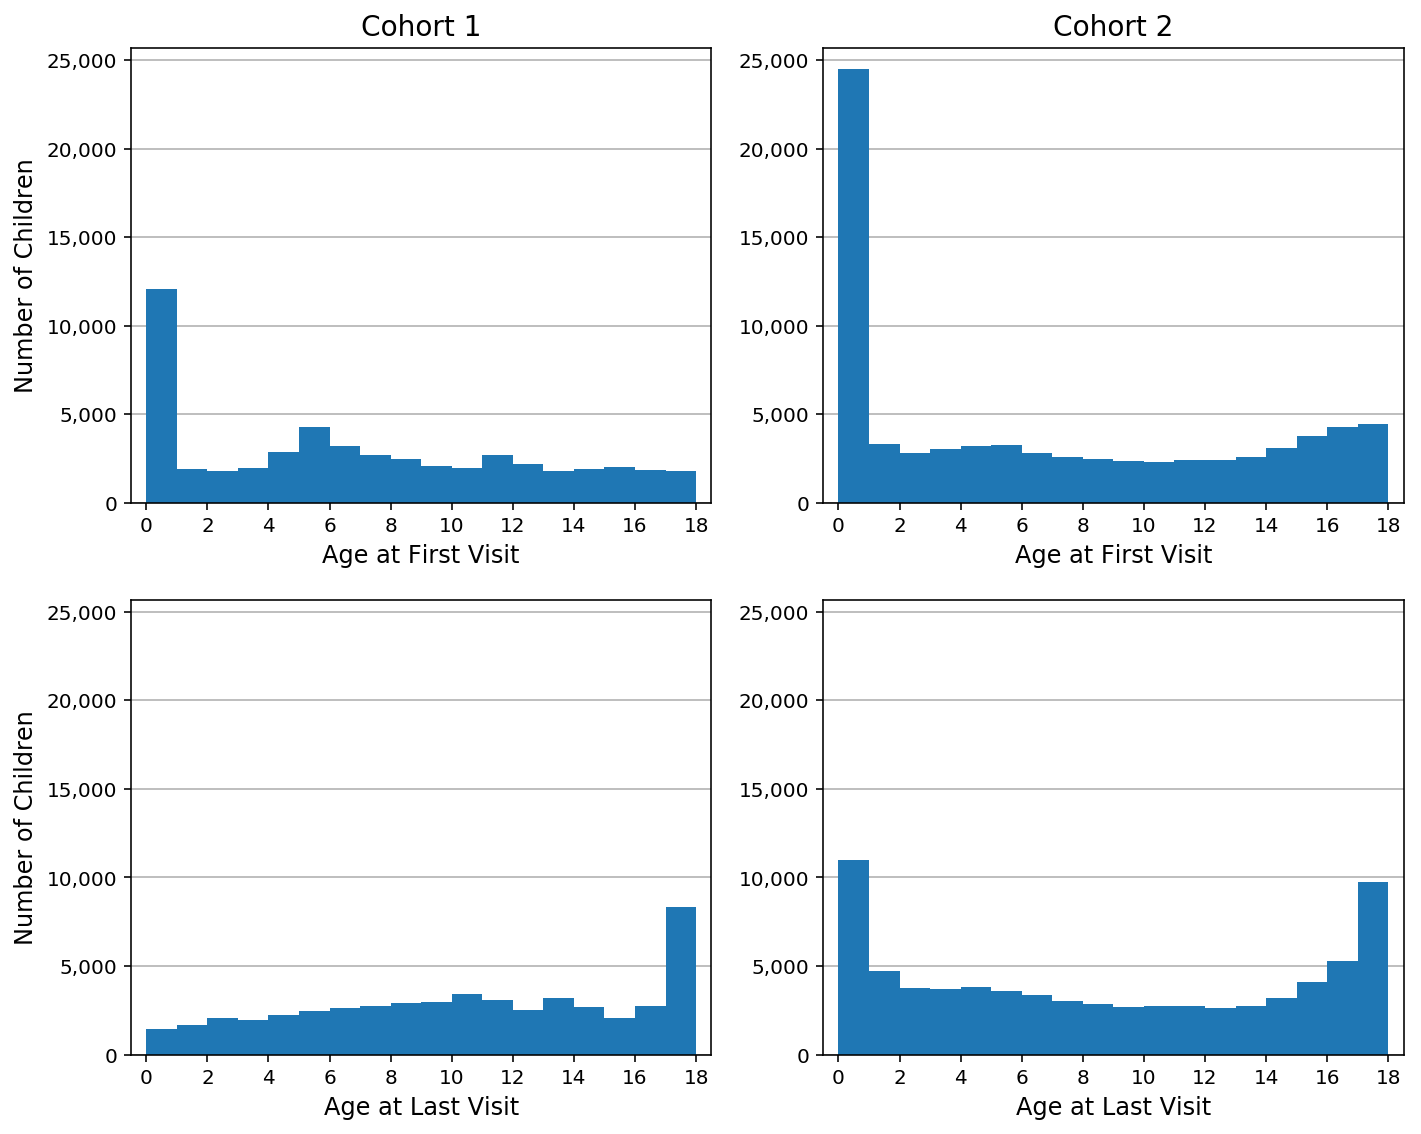

In [28]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(222, sharey=ax1, sharex=ax1)
ax2 = fig.add_subplot(223, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(224, sharey=ax1, sharex=ax1)

ax1.hist(d1_ranges[:, 0], bins=18, range=(0,18))
ax2.hist(d1_ranges[:, 1], bins=18, range=(0,18))
ax3.hist(d2_ranges[:, 0], bins=18, range=(0,18))
ax4.hist(d2_ranges[:, 1], bins=18, range=(0,18))

xticks = np.linspace(0, 18, 10, dtype=int)
yticks = ['{:,.0f}'.format(y) for y in ax1.get_yticks()]
for ax in (ax1, ax2, ax3, ax4):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_yticklabels(yticks)
    ax.set_xlim(-0.5, 18.5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

ax1.set_xlabel('Age at First Visit', fontsize=12)
ax2.set_xlabel('Age at Last Visit', fontsize=12)
ax3.set_xlabel('Age at First Visit', fontsize=12)
ax4.set_xlabel('Age at Last Visit', fontsize=12)

ax1.set_ylabel('Number of Children', fontsize=12)
ax2.set_ylabel('Number of Children', fontsize=12)

ax1.set_title('Cohort 1', fontsize=14)
ax3.set_title('Cohort 2', fontsize=14)

plt.tight_layout()
plt.show()

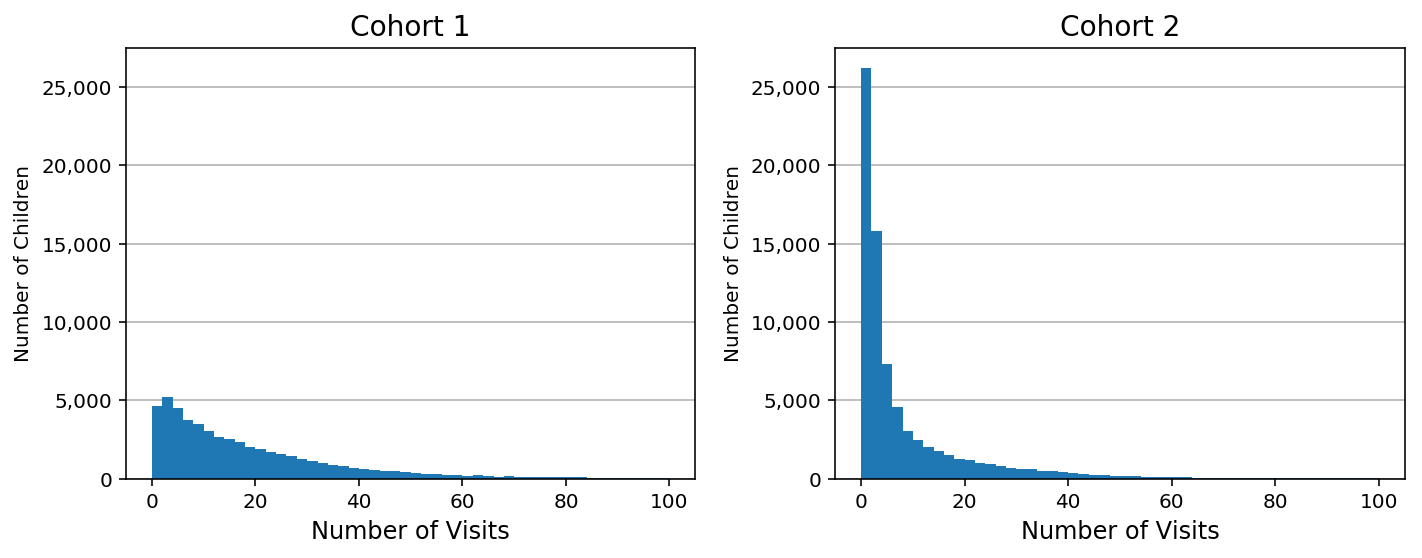

In [29]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1, sharex=ax1)

ax1.hist(d1_visits, bins=50, range=(0,100))
ax2.hist(d2_visits, bins=50, range=(0,100))

xticks = np.linspace(0, 18, 10, dtype=int)
yticks = ['{:,.0f}'.format(y) for y in ax1.get_yticks()]
for ax in (ax1, ax2):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_yticklabels(yticks)

ax1.set_xlabel('Number of Visits', fontsize=12)
ax2.set_xlabel('Number of Visits', fontsize=12)


ax1.set_ylabel('Number of Children')
ax2.set_ylabel('Number of Children')

ax1.set_title('Cohort 1', fontsize=14)
ax2.set_title('Cohort 2', fontsize=14)

plt.tight_layout()
plt.show()

In [30]:
print('Patients with 1 visit in all of Cohort 1: {:,.0f}'.format((d1_visits == 1.).sum()))
print('Patients with 1 visit in focus set of Cohort 1: {:,.0f}'.format((d1_visits[ix_filter_1] == 1.).sum()))
print()
print('Patients with 1 visit in all of Cohort 2: {:,.0f}'.format((d2_visits == 1.).sum()))
print('Patients with 1 visit in focus set of Cohort 2: {:,.0f}'.format((d2_visits[ix_filter_2] == 1.).sum()))

Patients with 1 visit in all of Cohort 1: 3,388
Patients with 1 visit in focus set of Cohort 1: 5

Patients with 1 visit in all of Cohort 2: 26,191
Patients with 1 visit in focus set of Cohort 2: 0


In [31]:
d1_bins = np.linspace(0, 27, 28)
d2_bins = np.linspace(0, 18, 19)
d1_filt0 = [l - f >= 0/12 and f > 0 for f, l in d1_ranges]
d2_filt0 = [l - f >= 0/12 and f > 0 for f, l in d2_ranges]
d1_filt3 = [l - f >= 3/12 and f > 0 for f, l in d1_ranges]
d2_filt3 = [l - f >= 3/12 and f > 0 for f, l in d2_ranges]

d1_grid0 = make_grid(d1_ranges, d1_bins, d1_filt0)
d1_grid3 = make_grid(d1_ranges, d1_bins, d1_filt3)
d2_grid0 = make_grid(d2_ranges, d2_bins, d2_filt0)
d2_grid3 = make_grid(d2_ranges, d2_bins, d2_filt3)

/home/rob/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


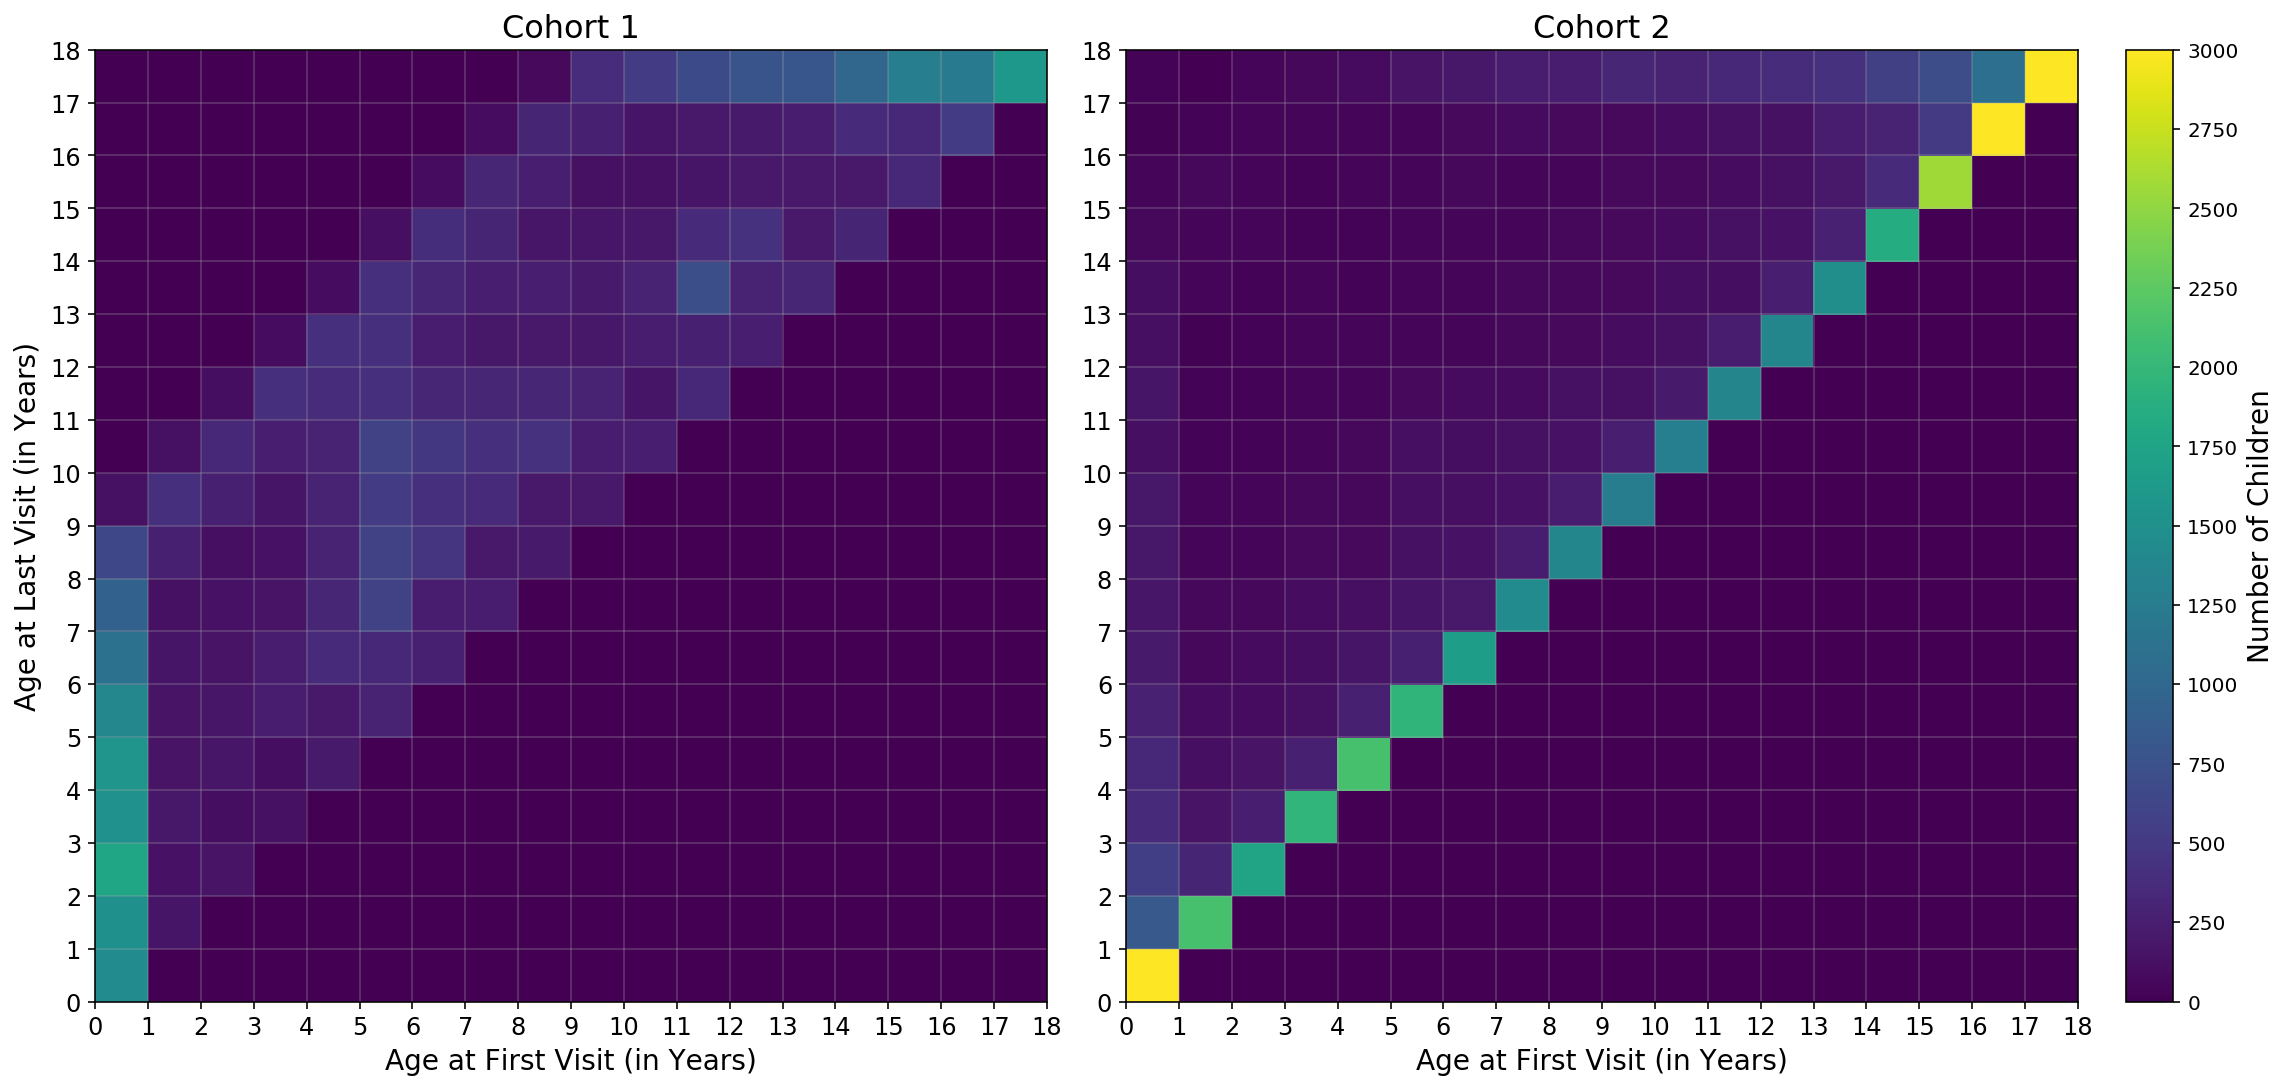

In [32]:
fig, (ax1, ax2, cax) = plt.subplots(ncols=3,figsize=(16,8), gridspec_kw={"width_ratios": [1, 1, 0.05], "height_ratios": [1]})
fig.subplots_adjust(wspace=0.15)

dmax = round(np.max([np.max(d) for d in (d1_grid0, d2_grid0)]) / 1000, 1) * 1000
dmax = 3000
im1  = ax1.imshow(d1_grid0, vmin=0, vmax=dmax)
im2 = ax2.imshow(d2_grid0, vmin=0, vmax=dmax)

for ax in (ax1, ax2):
    ax.set_xlim(-0.5, 17.5)
    ax.set_ylim(-0.5, 17.5)
    ax.set_xticks(np.linspace(-0.5, 17.5, 19))
    ax.set_yticks(np.linspace(-0.5, 17.5, 19))
    ax.set_xticklabels(d2_bins.astype(int), fontsize=12)
    ax.set_yticklabels(d2_bins.astype(int), fontsize=12)

    ax.set_xlabel('Age at First Visit (in Years)', fontsize=14)
    ax.grid(alpha=0.3)

ax1.set_ylabel('Age at Last Visit (in Years)', fontsize=14)
ax1.set_title('Cohort 1', fontsize=16)
ax2.set_title('Cohort 2', fontsize=16)

ip = InsetPosition(ax2, [1.05, 0, 0.05, 1])
cax.set_axes_locator(ip)

cbar = fig.colorbar(im1, cax=cax, ax=[ax1, ax2])
cticks = np.linspace(0, dmax, 13)
cbar.set_ticks(cticks)
cbar.set_label('Number of Children', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(right=0.96)
# plt.savefig('/<path>/first_18_years_no_min.png', dpi=360, bbox_to_inches=True)
plt.show()

/home/rob/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


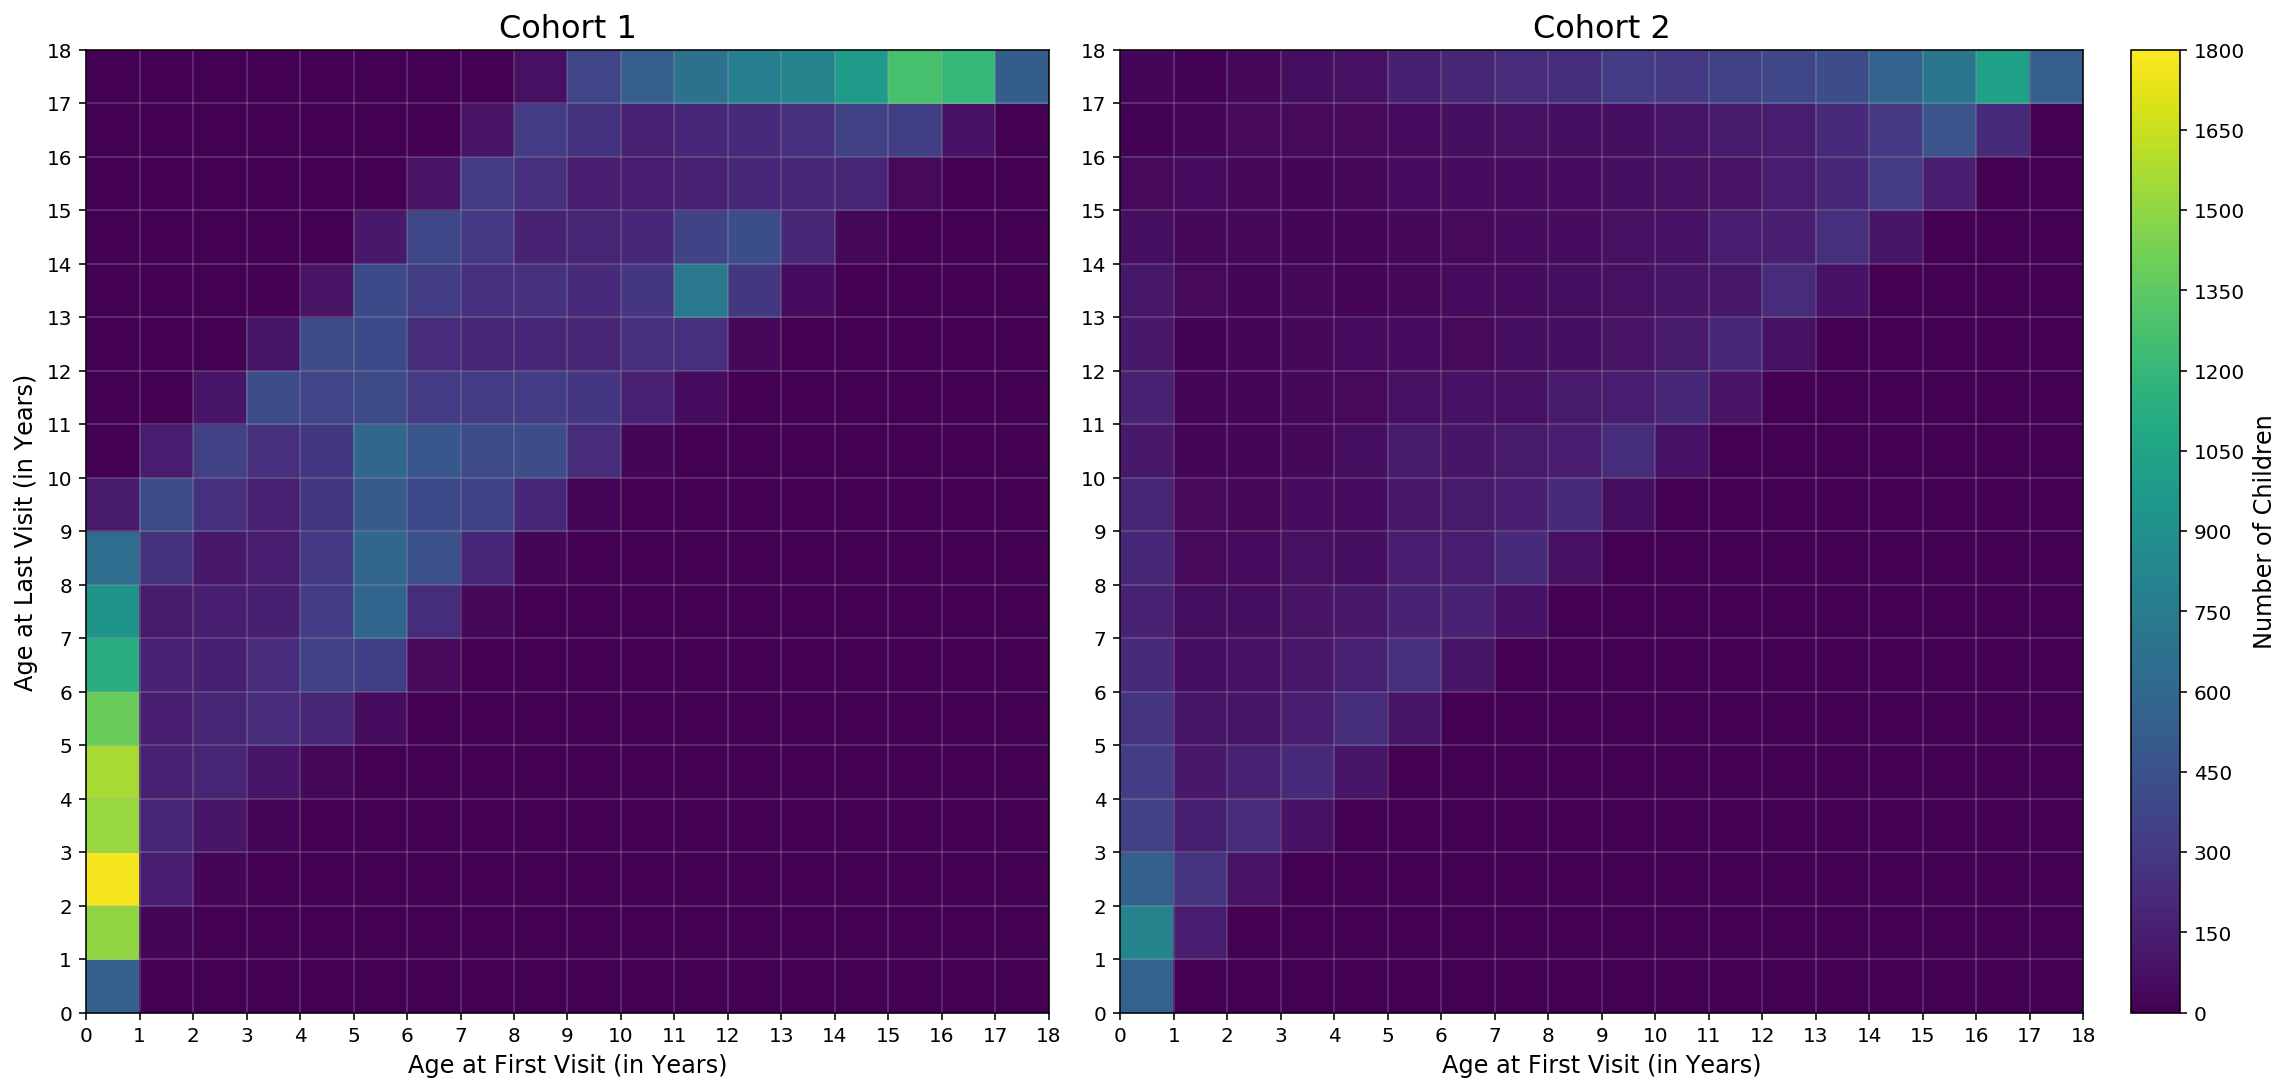

In [33]:
fig, (ax1, ax2, cax) = plt.subplots(ncols=3,figsize=(16,8), gridspec_kw={"width_ratios": [1, 1, 0.05], "height_ratios": [1]})
fig.subplots_adjust(wspace=0.15)

dmax = round(np.max([np.max(d) for d in (d1_grid3, d2_grid3)]) / 1000, 1) * 1000
im1  = ax1.imshow(d1_grid3, vmin=0, vmax=dmax)
im2 = ax2.imshow(d2_grid3, vmin=0, vmax=dmax)

for ax in (ax1, ax2):
    ax.set_xlim(-0.5, 17.5)
    ax.set_ylim(-0.5, 17.5)
    ax.set_xticks(np.linspace(-0.5, 17.5, 19))
    ax.set_yticks(np.linspace(-0.5, 17.5, 19))
    ax.set_xticklabels(d2_bins.astype(int))
    ax.set_yticklabels(d2_bins.astype(int))

    ax.set_xlabel('Age at First Visit (in Years)', fontsize=12)
    ax.grid(alpha=0.3)

ax1.set_ylabel('Age at Last Visit (in Years)', fontsize=12)
ax1.set_title('Cohort 1', fontsize=16)
ax2.set_title('Cohort 2', fontsize=16)

ip = InsetPosition(ax2, [1.05, 0, 0.05, 1])
cax.set_axes_locator(ip)

cbar = fig.colorbar(im1, cax=cax, ax=[ax1, ax2])
cticks = np.linspace(0, dmax, 13)
cbar.set_ticks(cticks)
cbar.set_label('Number of Children', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(right=0.96)
# plt.savefig('/<path>/first_18_years_min_3.png', dpi=360, bbox_to_inches=True)
plt.show()

## Describe the distribution of first and last visits in the each cohort - after filtering on the focus set

In [34]:
d1_ranges2 = d1_ranges[ix_filter_1]
d2_ranges2 = d2_ranges[ix_filter_2]
d1_visits2 = d1_visits[ix_filter_1]
d2_visits2 = d2_visits[ix_filter_2]

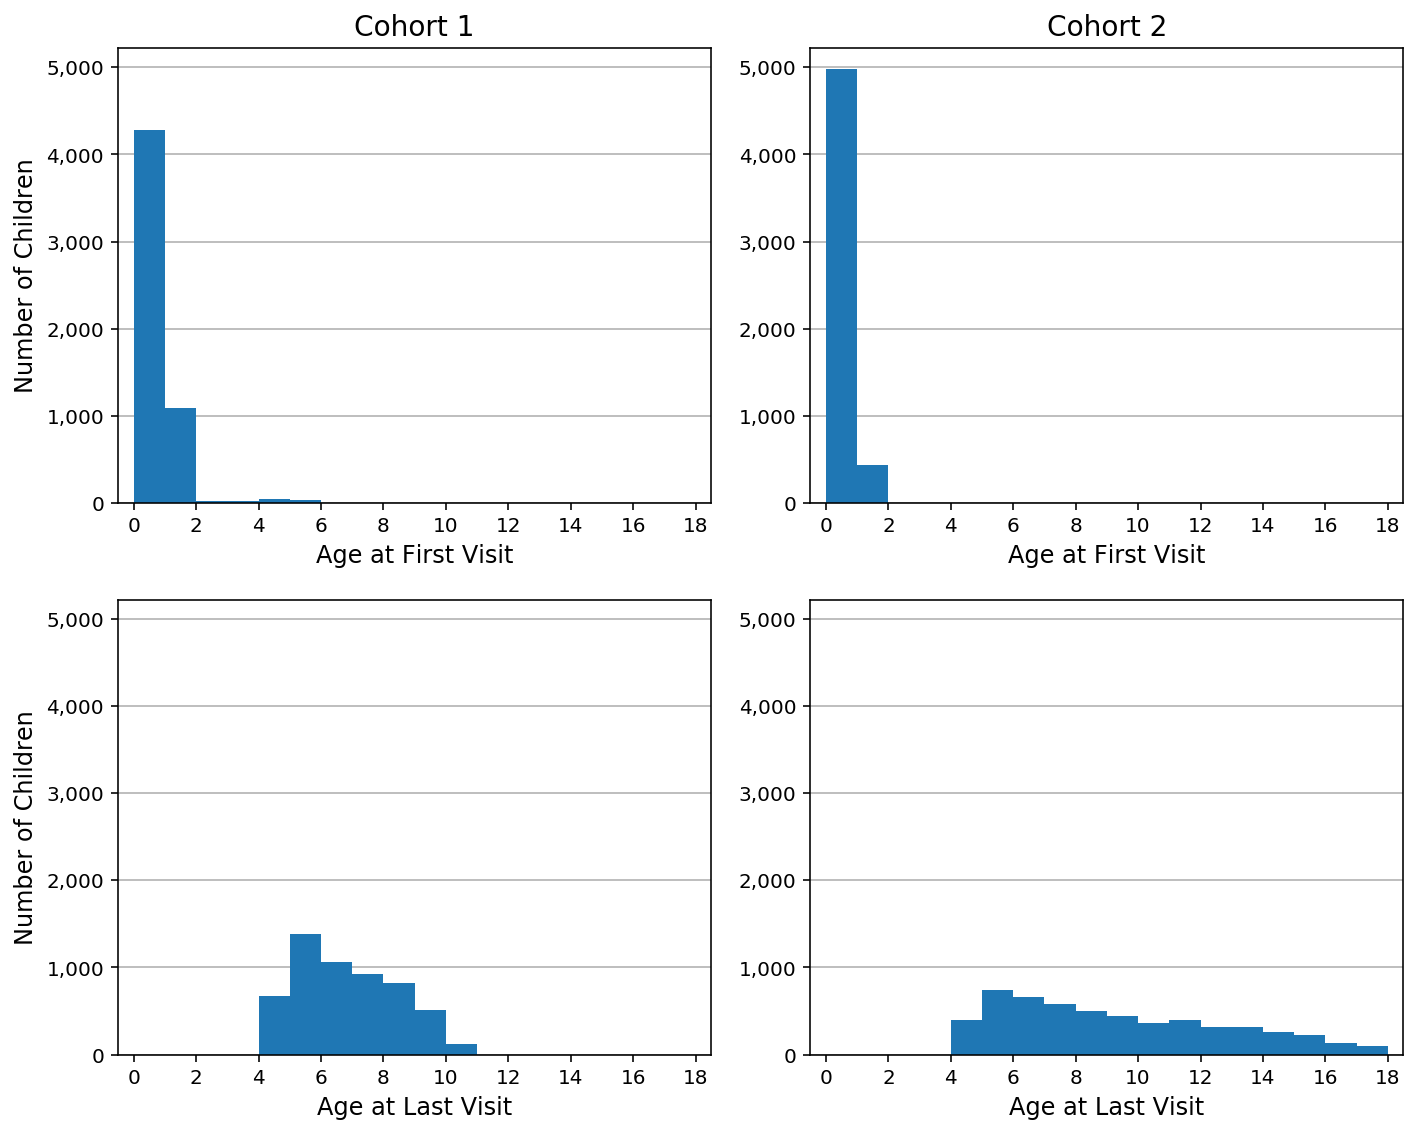

In [35]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(222, sharey=ax1, sharex=ax1)
ax2 = fig.add_subplot(223, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(224, sharey=ax1, sharex=ax1)

ax1.hist(d1_ranges2[:, 0], bins=18, range=(0,18))
ax2.hist(d1_ranges2[:, 1], bins=18, range=(0,18))
ax3.hist(d2_ranges2[:, 0], bins=18, range=(0,18))
ax4.hist(d2_ranges2[:, 1], bins=18, range=(0,18))

xticks = np.linspace(0, 18, 10, dtype=int)
yticks = ['{:,.0f}'.format(y) for y in ax1.get_yticks()]
for ax in (ax1, ax2, ax3, ax4):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_yticklabels(yticks)
    ax.set_xlim(-0.5, 18.5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

ax1.set_xlabel('Age at First Visit', fontsize=12)
ax2.set_xlabel('Age at Last Visit', fontsize=12)
ax3.set_xlabel('Age at First Visit', fontsize=12)
ax4.set_xlabel('Age at Last Visit', fontsize=12)

ax1.set_ylabel('Number of Children', fontsize=12)
ax2.set_ylabel('Number of Children', fontsize=12)

ax1.set_title('Cohort 1', fontsize=14)
ax3.set_title('Cohort 2', fontsize=14)

plt.tight_layout()
plt.show()

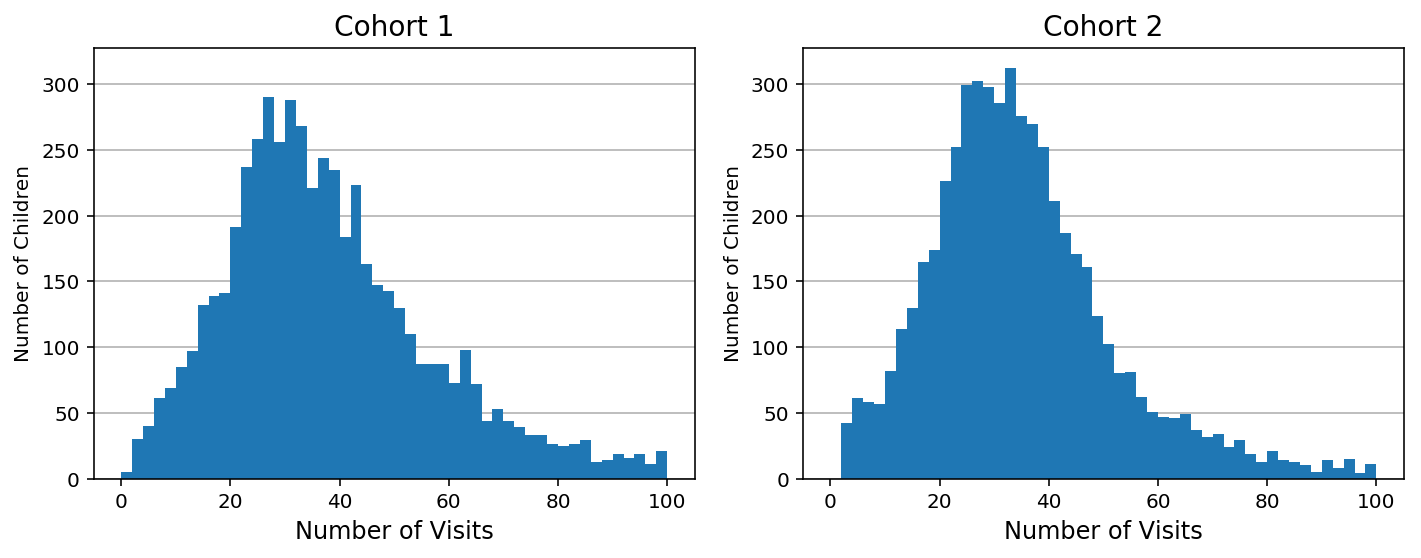

In [36]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1, sharex=ax1)

ax1.hist(d1_visits2, bins=50, range=(0,100))
ax2.hist(d2_visits2, bins=50, range=(0,100))

xticks = np.linspace(0, 18, 10, dtype=int)
yticks = ['{:,.0f}'.format(y) for y in ax1.get_yticks()]
for ax in (ax1, ax2):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_yticklabels(yticks)

ax1.set_xlabel('Number of Visits', fontsize=12)
ax2.set_xlabel('Number of Visits', fontsize=12)


ax1.set_ylabel('Number of Children')
ax2.set_ylabel('Number of Children')

ax1.set_title('Cohort 1', fontsize=14)
ax2.set_title('Cohort 2', fontsize=14)

plt.tight_layout()
plt.show()

In [37]:
cohort1 = make_grid(d1_ranges, d1_bins, ix_filter_1)
cohort2 = make_grid(d2_ranges, d2_bins, ix_filter_2)
ix_filter_1.sum(), ix_filter_2.sum()

(5509, 5415)

/home/rob/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


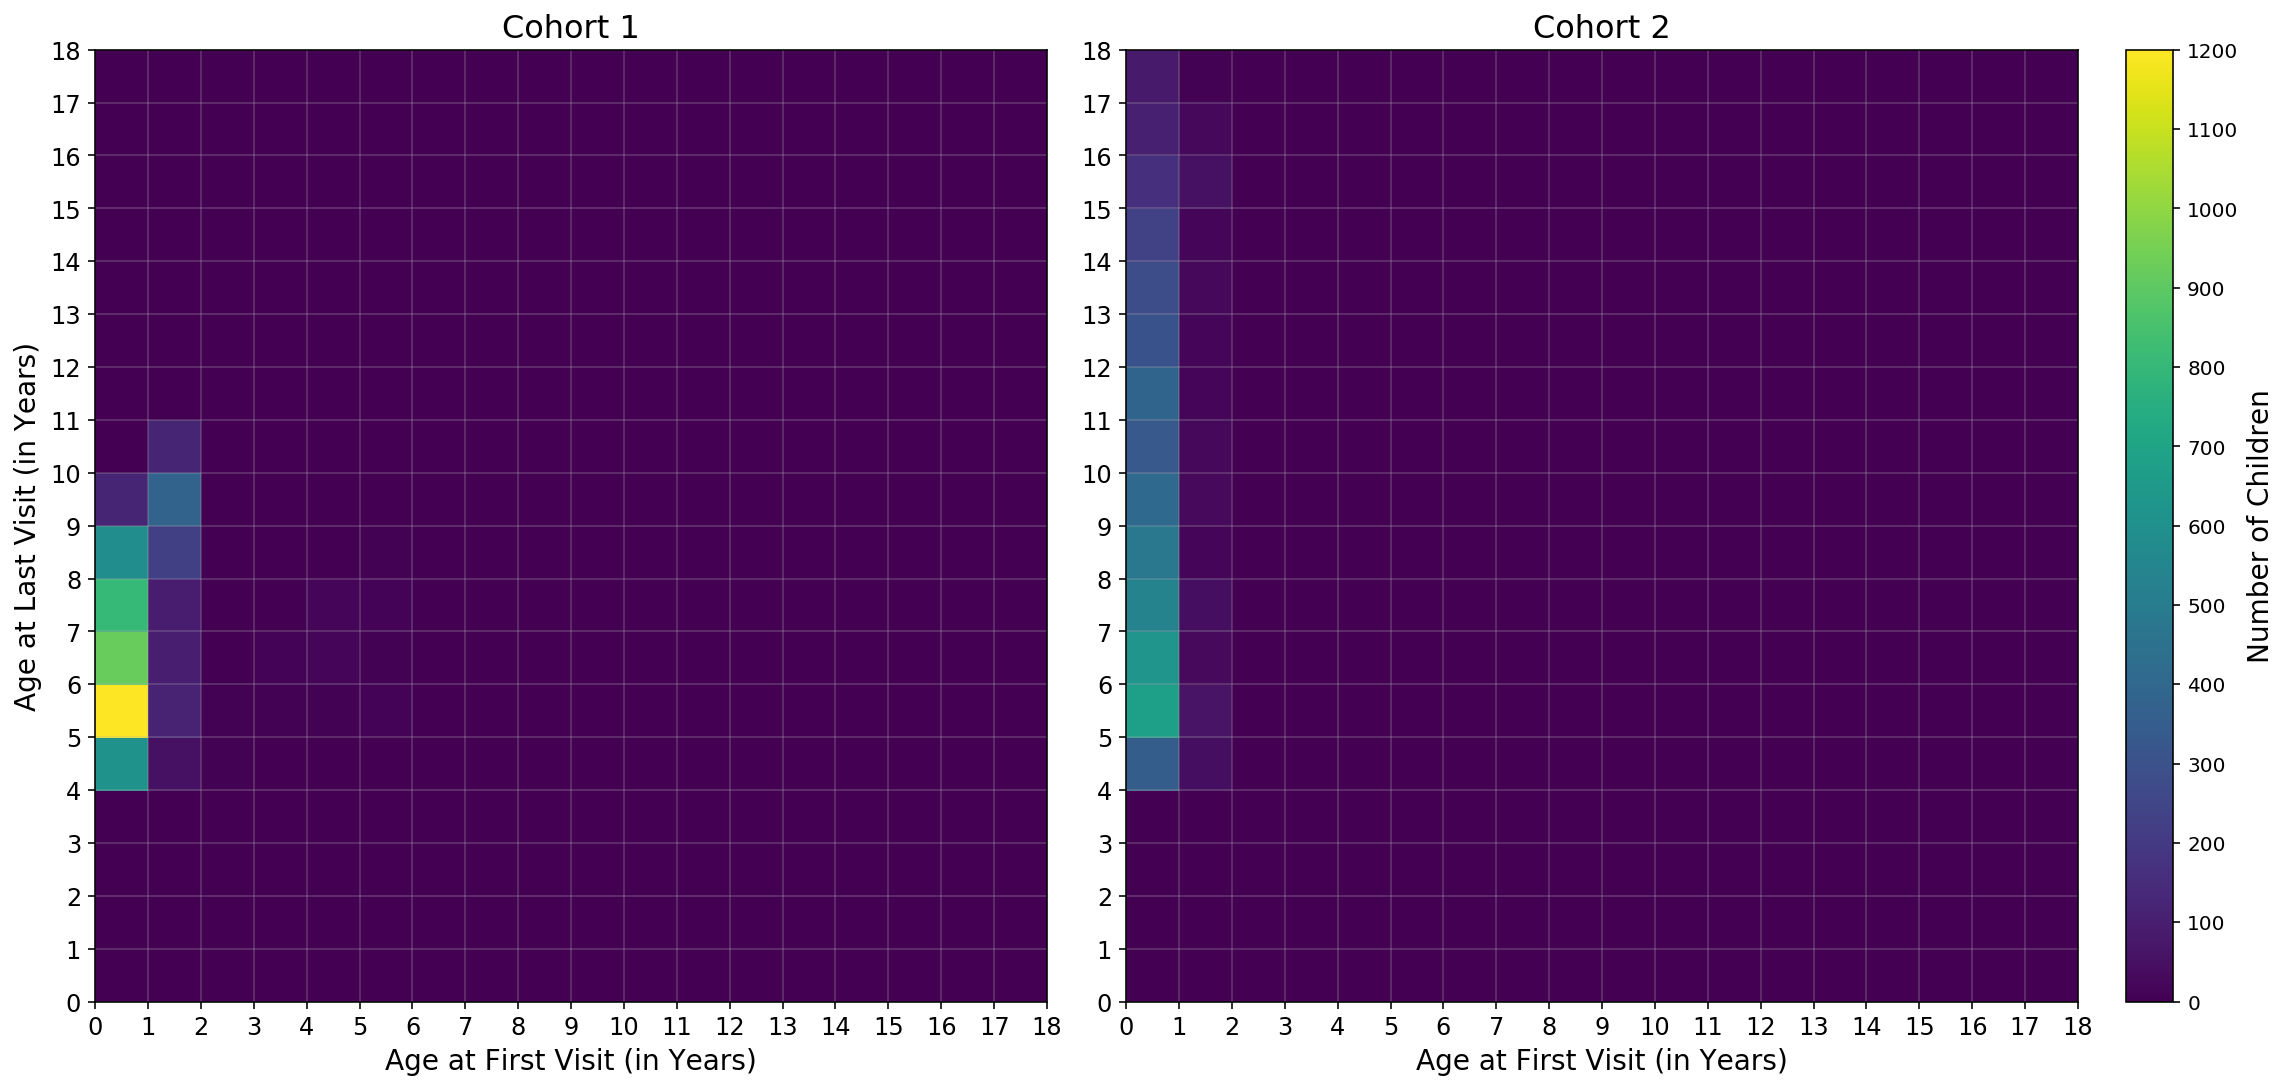

In [38]:
fig, (ax1, ax2, cax) = plt.subplots(ncols=3,figsize=(16,8), gridspec_kw={"width_ratios": [1, 1, 0.05], "height_ratios": [1]})
fig.subplots_adjust(wspace=0.15)

dmax = round(np.max([np.max(d) for d in (cohort1, cohort2)]) / 1000, 1) * 1000
im1  = ax1.imshow(cohort1, vmin=0, vmax=dmax)
im2 = ax2.imshow(cohort2, vmin=0, vmax=dmax)

for ax in (ax1, ax2):
    ax.set_xlim(-0.5, 17.5)
    ax.set_ylim(-0.5, 17.5)
    ax.set_xticks(np.linspace(-0.5, 17.5, 19))
    ax.set_yticks(np.linspace(-0.5, 17.5, 19))
    ax.set_xticklabels(d2_bins.astype(int), fontsize=12)
    ax.set_yticklabels(d2_bins.astype(int), fontsize=12)

    ax.set_xlabel('Age at First Visit (in Years)', fontsize=14)
    ax.grid(alpha=0.3)

ax1.set_ylabel('Age at Last Visit (in Years)', fontsize=14)
ax1.set_title('Cohort 1', fontsize=16)
ax2.set_title('Cohort 2', fontsize=16)

ip = InsetPosition(ax2, [1.05, 0, 0.05, 1])
cax.set_axes_locator(ip)

cbar = fig.colorbar(im1, cax=cax, ax=[ax1, ax2])
cticks = np.linspace(0, dmax, 13)
cbar.set_ticks(cticks)
cbar.set_label('Number of Children', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(right=0.96)
# plt.savefig('/<path>/valid_cohort_age_ranges.png', dpi=360, bbox_to_inches=True)
plt.show()

## Find out the number of children with records at birth in the data

In [39]:
for i, (f, s) in enumerate(zip(feature_headers, (x1_1 != 0).sum(axis=0))):
    if f.lower().endswith('atbirth') and s > 0:
        print(i, f, s)
        
for i, (f, s) in enumerate(zip(feature_headers, (x2_1 != 0).sum(axis=0))):
    if f.lower().endswith('atbirth') and s > 0:
        print(i, f, s)

In [40]:
for i, (f, s) in enumerate(zip(feature_headers, (x1_2 != 0).sum(axis=0))):
    if f.lower().endswith('atbirth') and s > 0:
        print(i, f, s)
        
for i, (f, s) in enumerate(zip(feature_headers, (x2_2 != 0).sum(axis=0))):
    if f.lower().endswith('atbirth') and s > 0:
        print(i, f, s)

4117 Vital: BMI-AtBirth 1044
4122 Vital: Ht-AtBirth 2584
4125 Vital: Wt-AtBirth 3676
19233 Vital: Wt for Length ZScore-AtBirth 2472
4117 Vital: BMI-AtBirth 1024
4122 Vital: Ht-AtBirth 2527
4125 Vital: Wt-AtBirth 3605
19233 Vital: Wt for Length ZScore-AtBirth 2418


## Height and weight distribution for all readings in Cohort 1

In [41]:
hts = []
wts = []
for ix, (skip, patient_data) in enumerate(zip(ix_filter_1, d1.values())):
    if not skip:
        continue
    ht = [el[1] for el in patient_data['vitals']['Ht']]
    hts += ht
    wt = [el[1] for el in patient_data['vitals']['Wt']]
    wts += wt

In [42]:
np.min(hts), np.max(hts), np.mean(hts), np.std(hts), np.median(hts), len(hts)

(0.0, 4606.0, 37.385229812519093, 22.836234620689972, 38.5, 173511)

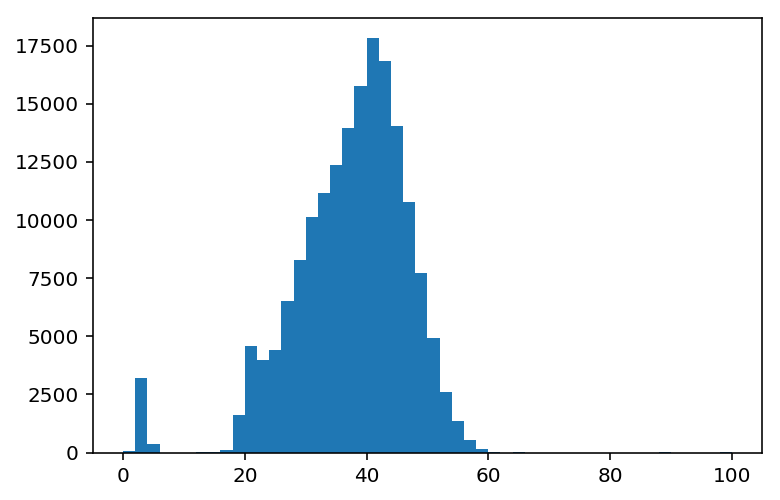

In [43]:
plt.hist(hts, range=(0,100), bins=50);

In [44]:
np.min(wts), np.max(wts), np.mean(wts), np.std(wts), np.median(wts), len(wts)

(0.0, 3705.0, 36.300147153790327, 19.385811117468666, 34.0, 187372)

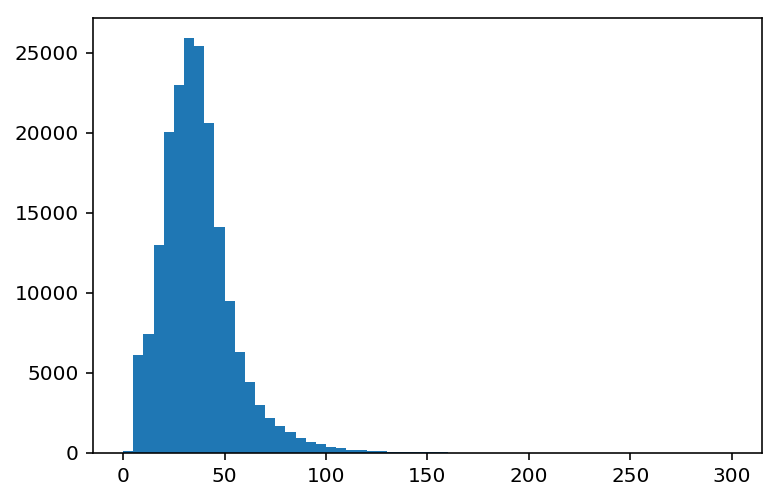

In [45]:
plt.hist(wts, range=(0,300), bins=60);

## Height and weight distribution for all readings in Cohort 2

In [46]:
hts = []
wts = []
for ix, (skip, patient_data) in enumerate(zip(ix_filter_2, d2.values())):
    if not skip:
        continue
    ht = [el[1] for el in patient_data['vitals']['Ht']]
    hts += ht
    wt = [el[1] for el in patient_data['vitals']['Wt']]
    wts += wt

In [47]:
np.min(hts), np.max(hts), np.mean(hts), np.std(hts), np.median(hts), len(hts)

(0.0, 1253206.7, 59.996210543605144, 5195.3662529535086, 37.0, 170473)

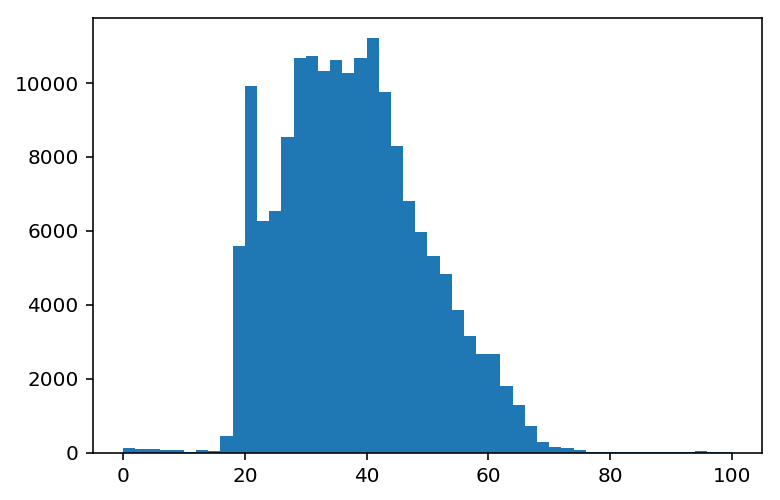

In [48]:
plt.hist(hts, range=(0,100), bins=50);

In [49]:
np.min(wts), np.max(wts), np.mean(wts), np.std(wts), np.median(wts), len(wts)

(0.0,
 89110.800000000003,
 59.621352823473025,
 417.01512395469985,
 35.100000000000001,
 273369)

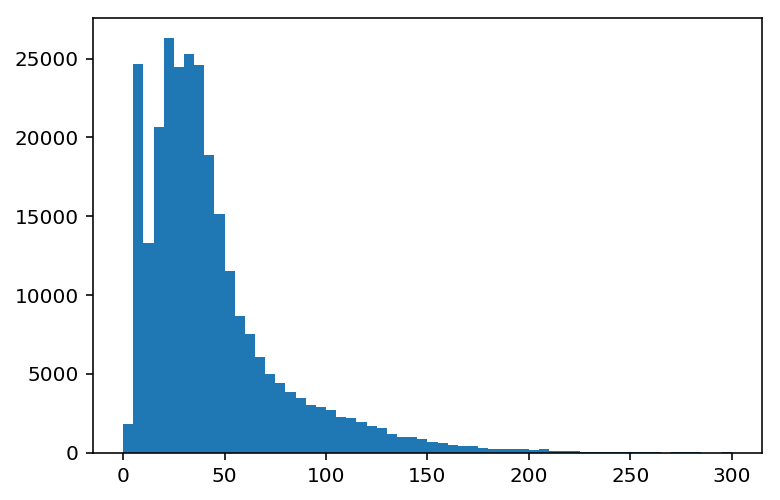

In [50]:
plt.hist(wts, range=(0,300), bins=60);

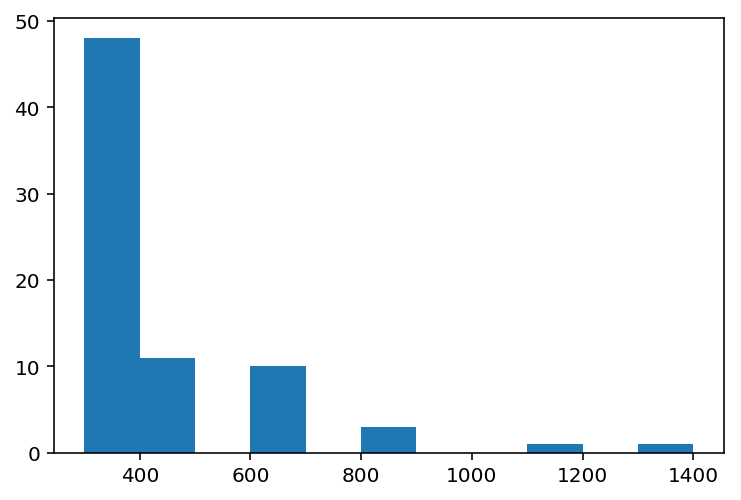

In [51]:
plt.hist(wts, range=(300,1400), bins=11);